<a href="https://colab.research.google.com/github/itsRushikesh/ML_Projects/blob/main/SImple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple_Linear_Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df  = pd.read_csv("HeightWeight.csv")

In [11]:
df.drop("Index", inplace=True, axis=1)

In [12]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [13]:
df.rename(columns={"Height(Inches)":"Height", "Weight(Pounds)":"Weight"}, inplace=True)

In [14]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0, 0.5, 'Weight')

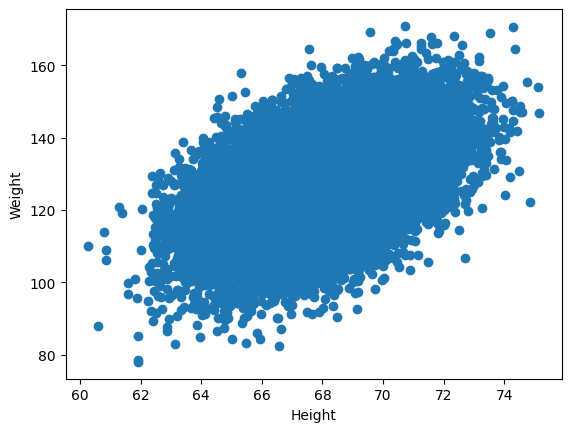

In [15]:
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [17]:
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


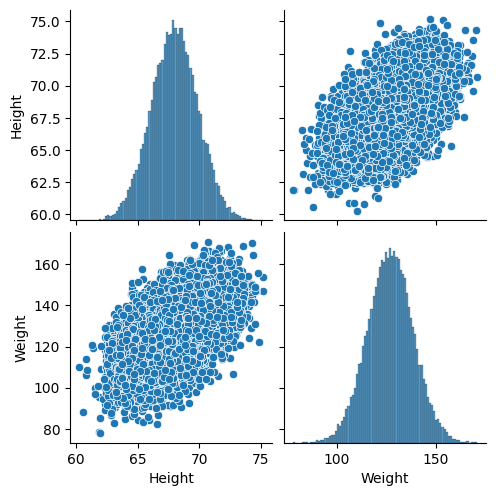

In [19]:
import seaborn as sns
sns.pairplot(df)

In [20]:
#independt feature
x = df[['Weight']]
np.array(x).shape

(25000, 1)

In [21]:
#dependent Feature
y= df['Height']

In [22]:
#train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [23]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [27]:
print("Coefficient or slope:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficient or slope: [0.94883892]
Intercept: 67.9938252704


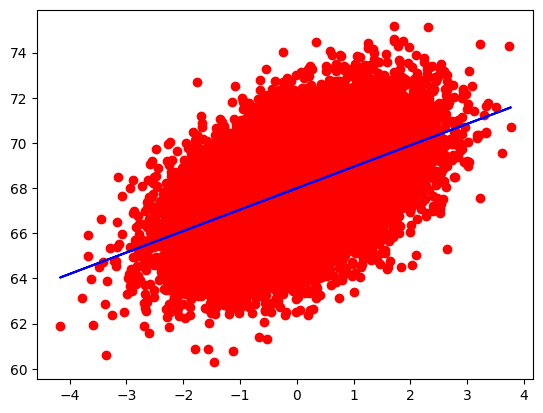

In [29]:
#plot best fit line
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, lr.predict(x_train), color="blue")

In [31]:
#prediction for test data
y_pred = lr.predict(x_test)
print(y_pred)

[68.58261344 66.76157097 68.7214503  ... 68.69540615 66.88567232
 67.99616317]


In [32]:
#performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.7333807993730996
Mean Absolute Error: 1.3166150322297803
Root Mean Squared Error: 1.6532939240719116


In [33]:
#R2 performance metrics
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.2592643941428425


In [34]:
#adjusted r2
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R2 Score:", adj_r2)

Adjusted R2 Score: 0.25914583850810224


In [36]:
#OLS Linear regression
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_sm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     6272.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:08:20   Log-Likelihood:                -35887.
No. Observations:               18750   AIC:                         7.178e+04
Df Residuals:                   18748   BIC:                         7.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.9938      0.012   5674.976      0.000      67.970      68.017
x1             0.9488      0.012     79.193      0.000       0.925       0.972
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.871
Skew:                          -0.017   Prob(JB):                        0.647
Kurtosis:                       3.005   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#predict for new data
lr.predict([[40]])

array([105.94738214])